In [59]:
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import euclidean_distances
import matplotlib.pyplot as plt

def expand_cluster(point1, point2, m, clusters):
    expanded_list = set()
    cluster_value_set = set()
    for key in clusters:
        clust_values = clusters[key]
        cluster_value_set = cluster_value_set.union(clust_values)

    if point1 not in cluster_value_set and point2 not in cluster_value_set:
        expanded_list.add(point1)
        expanded_list.add(point2)
    else:
        for key in clusters:
            clust_values = clusters[key]
            if point1 in clust_values:
                expanded_list = expanded_list.union(clust_values)
            else:
                expanded_list.add(point1)
            if point2 in clust_values:
                expanded_list = expanded_list.union(clust_values)
            else:
                expanded_list.add(point2)
    clusters[m] = expanded_list

def hierarchical_clust(X, k):

    clusters = dict()

    #Step-1: calculate euclidean distances, replace all zero with inf for ease
    euclidean_distances_mat = euclidean_distances(X)
    euclidean_distances_mat = np.tril(euclidean_distances_mat)
    euclidean_distances_mat[euclidean_distances_mat == 0] = np.inf

    m = euclidean_distances_mat.shape[0]
    num_points = euclidean_distances_mat.shape[0]

    #Step-2: run a while loop until all no non-inf distance is present in the dist_mat
    while m > 0: 
        min_ind = np.unravel_index(euclidean_distances_mat.argmin(), euclidean_distances_mat.shape)
        # min_ind will be in the form (x,y) -> we process along x
        
        x = min_ind[0]
        y = min_ind[1]

        expand_cluster(x, y, m, clusters)

        m -= 1

        for i in range(0, num_points):
            if i != x and i != y:
                dist_x_i = euclidean_distances_mat[x][i] if euclidean_distances_mat[x][i] != np.inf else euclidean_distances_mat[i][x]
                dist_y_i = euclidean_distances_mat[y][i] if euclidean_distances_mat[y][i] != np.inf else euclidean_distances_mat[i][y]
                min_val_between_points = max(dist_x_i, dist_y_i)
                min_val_between_points = dist_x_i
                euclidean_distances_mat[x][i] = min_val_between_points

        #Step-3: Set y rows and col in distance_mat to infifity to avoid recomputation
        euclidean_distances_mat[y] = np.inf
        euclidean_distances_mat[:,y] = np.inf
    return clusters




In [4]:
X = np.array([[0.4, 0.53],[0.22, 0.38],[0.35, 0.32],[0.26, 0.19],[0.08, 0.41],[0.45, 0.30]])
d = hierarchical_clust(X,2)

In [5]:
d

{6: {2, 5},
 5: {1, 4},
 4: {1, 2, 4, 5},
 3: {1, 2, 3, 4, 5},
 2: {0, 1, 2, 3, 4, 5},
 1: {0, 1, 2, 3, 4, 5}}

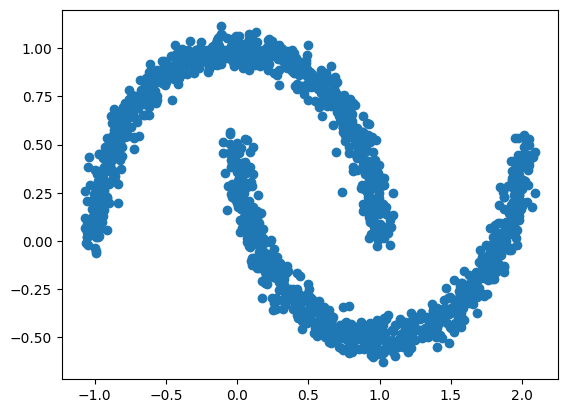

In [6]:
data_moons = pd.read_csv(r'moons.csv')
df_moons = pd.DataFrame(data_moons, columns=['Xmoons_X1', 'Xmoons_X2'])

df_moons.rename(columns={'Xmoons_X1': 'x', 'Xmoons_X2':'y'}, inplace = True)

x = df_moons['x']
y = df_moons['y']

plt.scatter(x, y)
plt.show()


In [60]:
epsilon = 0.5
minPts = 15

raw_moons_data = df_moons.to_numpy()

print(raw_moons_data.shape)

d = hierarchical_clust(raw_moons_data,2)

(1500, 2)


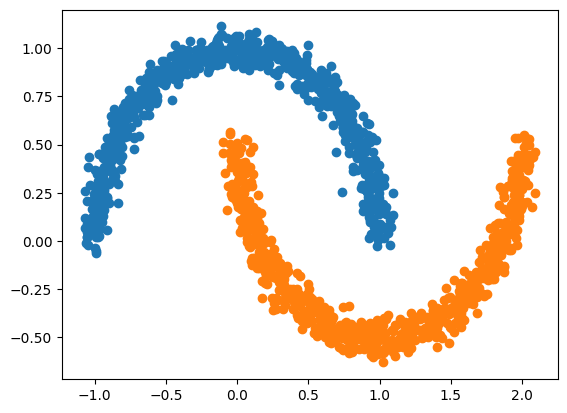

In [61]:
len(d[3])

cluster1 = d[3]
cluster2 = d[2] - cluster1

cluster1_x = []
cluster1_y = []

cluster2_x = []
cluster2_y = []

for point in cluster1:
    cluster1_x.append(x[point])

for point in cluster1:
    cluster1_y.append(y[point])

plt.scatter(cluster1_x, cluster1_y)

for point in cluster2:
    cluster2_x.append(x[point])

for point in cluster2:
    cluster2_y.append(y[point])


plt.scatter(cluster2_x, cluster2_y)
plt.show()
     